# Lending Club: Assessing Loan Default Risk

Context: Lending Club is a  P2P consumer lending business that offer alternative investment opportunities to the average investor. Investors can invest in debt instruments for either 36 or 60 months periods and generate historical average returns between 4-7%. We would like to assess the risks of these loans and classify good vs. bad loans.

Objective: 
- Predict and assess the level of risk or default of loans and loan applicants.
- Use machine learning to classify whether loan will be fully paid off. 
 
Good Loan: 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'

Bad Loan: 'Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Default']

Measure of success:
We will measure success by whether our model is able to classify whether a future loan will result in default or not. 

Population: our process and model will be applied to consumer loans between 2007-2018, and we will only look at accepted loans

Timeframe: Lending Club has 12 years of accepted loan data from 2007 - 2018.

Column Categories: 

columns related to hardship: 'orig_projected_additional_accrued_interest','hardship_loan_status','hardship_dpd','hardship_reason','hardship_status',
'deferral_term','hardship_amount','hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length',
'hardship_type','hardship_payoff_balance_amount','hardship_last_payment_amount','hardship_flag'

columns related to settlement: 'settlement_percentage','debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount','settlement_term', 'debt_settlement_flag'

columns related to secondary applicant: 'sec_app_mths_since_last_major_derog','sec_app_revol_util','revol_bal_joint','sec_app_chargeoff_within_12_mths',
'sec_app_num_rev_accts','sec_app_open_act_il','sec_app_open_acc','sec_app_mort_acc','sec_app_inq_last_6mths',
'sec_app_earliest_cr_line','sec_app_fico_range_high','sec_app_fico_range_low','sec_app_collections_12_mths_ex_med',
'verification_status_joint','dti_joint','annual_inc_joint', 'annual_inc_joint', 'dti_joint',

columns related to credit limits: 
'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'total_rev_hi_lim','il_util',

columns related to delinquency:
'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',  'mort_acc','bc_util',  'chargeoff_within_12_mths', 'delinq_amnt','inq_fi',  'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal','open_rv_12m',  'open_rv_24m', 'max_bal_bc','all_util', 'total_bal_il',
 'il_util', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
 
columns related to responsibility: 
'pct_tl_nvr_dlq', 'num_sats', 'num_bc_sats',  'bc_open_to_buy','all_util'

columns related to months of delinquency:
'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq','mths_since_rcnt_il',

columns related to application:
'policy_code', 'application_type'

columns related to applicant:
'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status',
 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog'




In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import _pickle as cPickle
%matplotlib inline
pd.set_option('display.max_rows',999)
pd.set_option('display.max_columns',999)


In [2]:
accept = pd.read_csv('accepted_2007_to_2018Q4.csv.gz')
accept.to_pickle('dfaccept')
df = pd.read_pickle('dfaccept')

C:\Users\mjdch\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Check missing Values

In [3]:
df.shape

(2260701, 151)

In [4]:
def missing_data(df):
    miss = np.sum(df.isnull(),axis =0)
    miss = miss.loc[miss>0].sort_values(ascending = False)
    missmean = np.mean(df.isnull(),axis =0)
    missmean = missmean.loc[missmean>0].sort_values(ascending = False)
    return pd.concat([miss.rename('count'),missmean.rename('mean')],axis = 1)

In [5]:
missing_data(df)

,count,mean
member_id,2260701,1.000000
orig_projected_additional_accrued_interest,2252050,0.996173
hardship_start_date,2249784,0.995171
hardship_type,2249784,0.995171
hardship_reason,2249784,0.995171
hardship_status,2249784,0.995171
deferral_term,2249784,0.995171
hardship_amount,2249784,0.995171
hardship_last_payment_amount,2249784,0.995171
hardship_payoff_balance_amount,2249784,0.995171


#### Drop/Remove Unnecessary Columns

In [6]:
#drop rows with all none values: 33 rows
index = df[df.funded_amnt.isnull()].index
df.drop(index, axis = 0, inplace = True)

#drop columns with 90% more missing values (columns are mainly related to hardship, settlement and secondary applicant)
#dtop columns with 38% more missing values: it will be tough to accurately impute
miss = missing_data(df)
misscolumns = miss.loc[miss['mean']>0.38].index
df.drop(misscolumns, axis =1, inplace = True)

#drop member_id and id, not needed for model. member_id was dropped already.
df.drop(['id'],axis = 1, inplace = True)

#drop features that were not available at the time of the loan application
df.drop(['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
        'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
        'last_credit_pull_d','debt_settlement_flag'], axis=1, inplace=True) 

#drop features with only one value, 'hardship_type','deferral_term','hardship_length' were already dropped:
# for col in df.columns:
#     if df[col].nunique() == 1:
#         print(df[col].value_counts())
df.drop(['policy_code'], axis = 1, inplace = True)

#drop columns that will be unnecessary for model, mostly columns with diverse string values.
#It would be interesting to apply NLP techniques to group descriptions and perform semantic analysis. 
#'desc' already dropped
df.drop(['url','emp_title','zip_code','title'],axis =1, inplace = True)

#the date the loan was issued does not give us any information about the borrower. drop 'issue_d'
df.drop(['issue_d'], axis=1, inplace=True)

#### Pickle semi-processed dataframe for memory efficiency

In [7]:
df.to_pickle('dfaccept_semiprocessed')
df = pd.read_pickle('dfaccept_semiprocessed')

In [8]:
missing_data(df)

,count,mean
mths_since_recent_inq,295435,0.130685
num_tl_120dpd_2m,153657,0.067970
emp_length,146907,0.064984
mo_sin_old_il_acct,139071,0.061518
bc_util,76071,0.033650
percent_bc_gt_75,75379,0.033344
bc_open_to_buy,74935,0.033147
mths_since_recent_bc,73412,0.032474
pct_tl_nvr_dlq,70431,0.031155
avg_cur_bal,70346,0.031117


In [9]:
#emp_length is of type object, we will convert this to integer
map = {"n/a":0, "< 1 ":1, "1 ":1, "2 ":2, "3 ":3, "4 ":4, "5 ":5, "6 ":6, "7 ":7, "8 ":8, "9 ":9, "10+ ":10}
df.emp_length = df.emp_length.str.replace("years","")
df.emp_length = df.emp_length.str.replace("year","")
df.emp_length.replace(map, inplace=True)

In [10]:
df.emp_length.value_counts()

10.0    748005
1.0     338391
2.0     203677
3.0     180753
5.0     139698
4.0     136605
6.0     102628
7.0      92695
8.0      91914
9.0      79395
Name: emp_length, dtype: int64

In [11]:
#column 'earliest_cr_line' describes the date when first credit line was established. The longer the duration the more desirable
#the borrower. We will convert this measure to number of days since first credit line was established.
df['earliest_cr_line'] = df['earliest_cr_line'].apply(pd.to_datetime)
end = np.datetime64('2018-12', 'D')
df['earliest_cr_line'] = pd.Timestamp(end) - df['earliest_cr_line']
df['earliest_cr_line'] = df['earliest_cr_line'] / np.timedelta64(1, 'D')
df['earliest_cr_line'] = df.earliest_cr_line.replace("NaN", 0)

#### Classify dependent variable

In [12]:
df_negClass = df[df['loan_status'].isin(['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'])]

df_posClass = df[df['loan_status'].isin(['Charged Off', 
                                         'Does not meet the credit policy. Status:Charged Off', 'Default'])]


df = pd.concat([df_negClass, df_posClass]).reset_index(drop = True)


In [13]:
df['loan_status_binary'] = (~df.loan_status.isin(['Fully Paid',\
                                                  'Does not meet the credit policy. Status:Fully Paid'])).astype(int)

In [14]:
df.loan_status_binary.value_counts()

0    1078739
1     269360
Name: loan_status_binary, dtype: int64

In [15]:
df.drop('loan_status', axis = 1, inplace = True)

After trimming the dataset, some columns only contain one value. Drop them. 

In [16]:
# for col in df.columns:
#     if df[col].nunique() == 1:
#         print(df[col].value_counts())

#column 'pymnt_plan' and 'hardship_flag' only contains values 'n', 'N', respectively
#after trimming the dataset to default vs. non-default. so we drop. 
df.drop(['pymnt_plan', 'hardship_flag'],axis =1 , inplace = True)


#### Drop columns to avoid multicollinearity

In [17]:
corrmatrix = df.corr().abs()
corrmatrix = corrmatrix.stack()
corrmatrix[(corrmatrix > 0.6) & (corrmatrix != 1.0)].sort_values(ascending=True)

mths_since_recent_bc        mo_sin_rcnt_rev_tl_op         0.603939
mo_sin_rcnt_rev_tl_op       mths_since_recent_bc          0.603939
                            mo_sin_rcnt_tl                0.610661
mo_sin_rcnt_tl              mo_sin_rcnt_rev_tl_op         0.610661
num_sats                    num_bc_sats                   0.614226
num_bc_sats                 num_sats                      0.614226
                            open_acc                      0.617806
open_acc                    num_bc_sats                   0.617806
num_bc_tl                   num_op_rev_tl                 0.619581
num_op_rev_tl               num_bc_tl                     0.619581
total_acc                   num_bc_tl                     0.624052
num_bc_tl                   total_acc                     0.624052
num_bc_sats                 num_rev_tl_bal_gt_0           0.639916
num_rev_tl_bal_gt_0         num_bc_sats                   0.639916
num_rev_accts               num_sats                      0.64

In [18]:
#drop 'funded_amnt_inv','funded_amnt'. these are unknown at the time of application. High multicollinearity with 'loan_amnt'
df.drop(['funded_amnt','funded_amnt_inv'], axis = 1, inplace = True)

#drop 'installment', a derivative of loan_amnt. high multicollinearity
df.drop(['installment'], axis =1 , inplace = True)

#drop 'num_actv_rev_tl'. high multicollinearity with 'num_rev_tl_bal_gt_0'. 'num_rev_tl_bal_gt_0' would be better indicator
# because it shows which active accounts actually have a balance vs. showing total accounts 
# where some may have a balance of 0. 
df.drop(['num_actv_rev_tl'], axis = 1, inplace = True)

#drop 'grade' and 'sub_grade'. We will not need these for our model, but would be interesting to compare results. 
df.drop(['grade','sub_grade'], axis = 1, inplace = True)

#drop 'last_fico_range_high' and 'last_fico_range_low' because these are datapoints post origination. 
df.drop(['last_fico_range_high','last_fico_range_low'], axis = 1, inplace = True)

In [19]:
#average fico low and fico high to get fico score. 
df['fico'] = df[['fico_range_low','fico_range_high']].mean(axis = 1)
df.drop(['fico_range_low','fico_range_high'], axis =1 , inplace = True)

Text(0, 0.5, 'Loan Status')

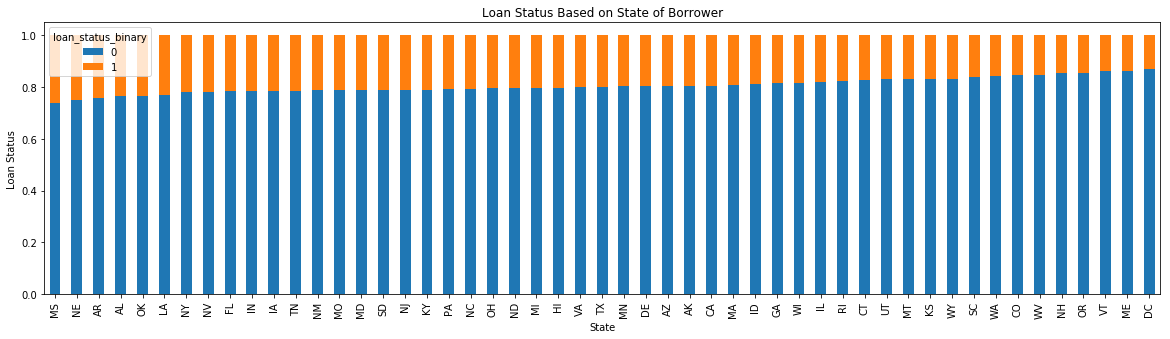

In [20]:
state = pd.crosstab(df.addr_state , df.loan_status_binary)
state = state.div(state.sum(1).astype(float), axis=0).sort_values(0)


state.plot(kind='bar', stacked=True, title='Loan Status Based on State of Borrower', figsize=(20,5))
plt.xlabel('State')
plt.ylabel('Loan Status')
# print(df.addr_state.value_counts())

In [21]:
#there are no obvious states that show higher default applicants 
#drop column on addr_state
df.drop(['addr_state'], axis=1, inplace=True)

On September 28th, 2012, LendingClub announced that, as opposed to its standard fractional investment business model, it would begin setting aside some loans that could only be purchased in their entirety–or as whole loans. LendingClub allows both institutional and retail investors to participate and claims to randomly select loans as whole or fractional without disenfranchsing either party. Several years later we can see that this still hold true and there is no significant difference between the defaults of a whole loan vs a fractional loan.  

https://www.lendacademy.com/lending-club-whole-loan-program-one-year-later/

Text(0, 0.5, 'Loan Status')

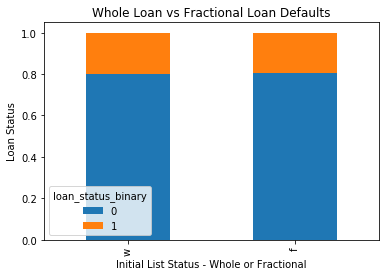

In [22]:
whole_fractional = pd.crosstab(df.initial_list_status , df.loan_status_binary)
whole_fractional = whole_fractional.div(whole_fractional.sum(1).astype(float),axis =0).sort_values(0)
whole_fractional.plot.bar(stacked = True, title = 'Whole Loan vs Fractional Loan Defaults')
plt.xlabel('Initial List Status - Whole or Fractional')
plt.ylabel('Loan Status')

In [23]:
# we can drop initial list status, lending club has claimed they randomly select applicants for whole or fractional and we
#see no obvious difference in the above chart. 
df.drop('initial_list_status', axis =1 , inplace = True)

Cash         1341199
DirectPay       6900
Name: disbursement_method, dtype: int64


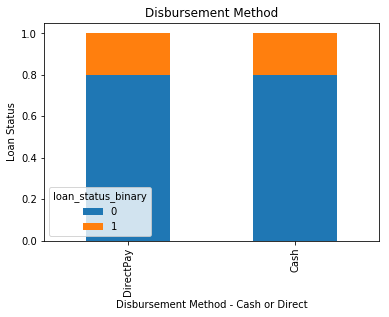

In [53]:
disbursement_method = pd.crosstab(df.disbursement_method , df.loan_status_binary)
disbursement_method = disbursement_method.div(disbursement_method.sum(1).astype(float),axis =0).sort_values(0)
disbursement_method.plot.bar(stacked = True, title = 'Disbursement Method')
plt.xlabel('Disbursement Method - Cash or Direct')
plt.ylabel('Loan Status')
print(df.disbursement_method.value_counts())

In [54]:
#no obvious difference between customers with different disbursement methods, and imbalanced class where most customers 
#disburse via cash, we will drop
df.drop(['disbursement_method'], axis=1, inplace=True)

#### Impute Missing Values

In [47]:
obj_cols = df.columns[df.dtypes==object]

#Imputer function
imputer = lambda x:x.fillna(x.value_counts().index[0]) 

#Impute dtype=object with most frequent value
df[obj_cols] = df[obj_cols].apply(imputer) 

#Impute the rest of df with median
df = df.fillna(df.median(axis=0)) 

In [56]:
len(df.columns)

59

#### Pickle cleaned dataframe

In [57]:
df.to_pickle('dfaccept_processed')
df = pd.read_pickle('dfaccept_processed')

In [58]:
df.loan_status_binary.value_counts()

0    1078739
1     269360
Name: loan_status_binary, dtype: int64

In [65]:
#reorder the columns so its easier to select y-variable later
columns = list(df.columns.values)
temp = columns[0]
columns[0] = columns[57]
columns[57] = temp
df = df[columns]

#### Dummify categorical variables

In [68]:
#Get categorical columns
cat_col = df.columns[df.dtypes==object] 

#Create dummy variables
df_dummy = pd.get_dummies(df[cat_col], drop_first = True) 

#Drop categorical columns already encoded
df.drop(cat_col, axis=1, inplace=True) 

#Join the dummy variables to original dataframe
df = df.join(df_dummy) 

#### Shuffle dataframe

In [105]:
df.loan_status_binary.value_counts()

0    1078739
1     269360
Name: loan_status_binary, dtype: int64

In [87]:
df1 = df.reindex(np.random.permutation(df.index))
df1 = df.reset_index(drop=True)


In [97]:
feat_labels = df1.columns[1:]
X = df1.iloc[1000000:1348099,1:]
y = df1.iloc[1000000:1348099,0]

In [98]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [99]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('int_rate', 0.07068057495067241)
('emp_length', 0.012550935713040438)
('annual_inc', 0.027829547094846967)
('dti', 0.028931242656682513)
('delinq_2yrs', 0.005024585575371886)
('earliest_cr_line', 0.03432922912420473)
('inq_last_6mths', 0.008047416332398161)
('open_acc', 0.014578122589519075)
('pub_rec', 0.004196366219803198)
('revol_bal', 0.025006346509893265)
('revol_util', 0.030933671590626648)
('total_acc', 0.01967566625881067)
('collections_12_mths_ex_med', 0.0010236910745391372)
('acc_now_delinq', 0.00021239618786465336)
('tot_coll_amt', 0.00820739238943242)
('tot_cur_bal', 0.026888161598260168)
('total_rev_hi_lim', 0.02593849751909564)
('acc_open_past_24mths', 0.015196996222306641)
('avg_cur_bal', 0.02956042994970421)
('bc_open_to_buy', 0.033627176279887025)
('bc_util', 0.0303386980782786)
('chargeoff_within_12_mths', 0.0005251030484619674)
('delinq_amnt', 0.00029232404895318987)
('mo_sin_old_il_acct', 0.026601230043985243)
('mo_sin_old_rev_tl_op', 0.02991293795419598)
('mo_sin_

In [102]:
pd.DataFrame(zip(feat_labels, clf.feature_importances_)).sort_values(1)

,0,1
63,purpose_educational,0.000000e+00
56,home_ownership_OTHER,1.342779e-08
55,home_ownership_NONE,1.628199e-07
73,purpose_wedding,8.545542e-06
39,num_tl_120dpd_2m,6.038682e-05
70,purpose_renewable_energy,9.515371e-05
40,num_tl_30dpd,1.503652e-04
13,acc_now_delinq,2.123962e-04
22,delinq_amnt,2.923240e-04
68,purpose_moving,4.948895e-04


#### Train Test Split

In [73]:
feat_labels = df.columns[1:]
X = df.iloc[:,1:]
y = df.iloc[:,0]


In [74]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [76]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

KeyboardInterrupt: 